In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [131]:
data = pd.read_excel('C:\\Users\\ganes\\Downloads\\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\\Flight_Ticket_Participant_Datasets\\Data_Train.xlsx')

In [132]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [133]:
data.shape

(10683, 11)

In [134]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [135]:
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])
data['Total_Stops'] = data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [136]:
data.isna().sum().sum()

0

In [137]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [138]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [139]:
data['year'] = data['Date_of_Journey'].dt.year
data['month'] = data['Date_of_Journey'].dt.month
data['day'] = data['Date_of_Journey'].dt.day

In [140]:
data['dep_hour'] = data['Dep_Time'].dt.hour
data['dep_minute'] = data['Dep_Time'].dt.minute
data['arr_hour'] = data['Arrival_Time'].dt.hour
data['arr_minute'] = data['Arrival_Time'].dt.minute

In [141]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,dep_hour,dep_minute,arr_hour,arr_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-24 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-24 05:50:00,2022-07-24 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-24 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-07-24 18:05:00,2022-07-24 23:30:00,5h 25m,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-07-24 16:50:00,2022-07-24 21:35:00,4h 45m,1 stop,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-07-24 19:55:00,2022-07-24 22:25:00,2h 30m,non-stop,No info,4107,2019,9,4,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-07-24 20:45:00,2022-07-24 23:20:00,2h 35m,non-stop,No info,4145,2019,4,27,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-07-24 08:20:00,2022-07-24 11:20:00,3h,non-stop,No info,7229,2019,4,27,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2022-07-24 11:30:00,2022-07-24 14:10:00,2h 40m,non-stop,No info,12648,2019,1,3,11,30,14,10


In [142]:
data = data.drop(columns = ['Date_of_Journey'])
data = data.drop(columns = ['Dep_Time'])
data = data.drop(columns = ['Arrival_Time'])

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
le = LabelEncoder()

In [145]:
data1 =le.fit_transform(data['Airline'])
data2 =le.fit_transform(data['Source'])
data3 =le.fit_transform(data['Destination'])
data4 =le.fit_transform(data['Route'])
data5 =le.fit_transform(data['Additional_Info'])
data6 =le.fit_transform(data['Duration'])
data7 =le.fit_transform(data['Total_Stops'])

In [146]:
data['Airline'] = data1
data['Source'] = data2
data['Destination'] = data3
data['Route'] = data4
data['Additional_Info'] = data5
data['Duration'] = data6
data['Total_Stops'] = data7

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  int32
 1   Source           10683 non-null  int32
 2   Destination      10683 non-null  int32
 3   Route            10683 non-null  int32
 4   Duration         10683 non-null  int32
 5   Total_Stops      10683 non-null  int32
 6   Additional_Info  10683 non-null  int32
 7   Price            10683 non-null  int64
 8   year             10683 non-null  int64
 9   month            10683 non-null  int64
 10  day              10683 non-null  int64
 11  dep_hour         10683 non-null  int64
 12  dep_minute       10683 non-null  int64
 13  arr_hour         10683 non-null  int64
 14  arr_minute       10683 non-null  int64
dtypes: int32(7), int64(8)
memory usage: 959.9 KB


In [148]:
data.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,dep_hour,dep_minute,arr_hour,arr_minute
10678,0,3,0,64,236,4,8,4107,2019,9,4,19,55,22,25
10679,1,3,0,64,237,4,8,4145,2019,4,27,20,45,23,20
10680,4,0,2,18,280,4,8,7229,2019,4,27,8,20,11,20
10681,10,0,5,18,238,4,8,12648,2019,1,3,11,30,14,10
10682,1,2,1,108,347,1,8,11753,2019,9,5,10,55,19,15


In [149]:
data.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,year,month,day,dep_hour,dep_minute,arr_hour,arr_minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.822896,194.069269,1.458111,7.393054,9087.064121,2019.0,5.534775,12.682205,12.490686,24.411214,13.348778,24.690630
std,2.352155,1.177221,1.474782,36.728405,108.620556,1.806290,1.214211,4611.359167,0.0,2.987489,8.803701,5.748650,18.767980,6.859125,16.506036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,2019.0,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,48.000000,106.000000,0.000000,8.000000,5277.000000,2019.0,3.000000,5.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,73.000000,233.000000,0.000000,8.000000,8372.000000,2019.0,5.000000,6.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,104.000000,280.000000,4.000000,8.000000,12373.000000,2019.0,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,127.000000,367.000000,4.000000,9.000000,79512.000000,2019.0,12.000000,27.000000,23.000000,55.000000,23.000000,55.000000


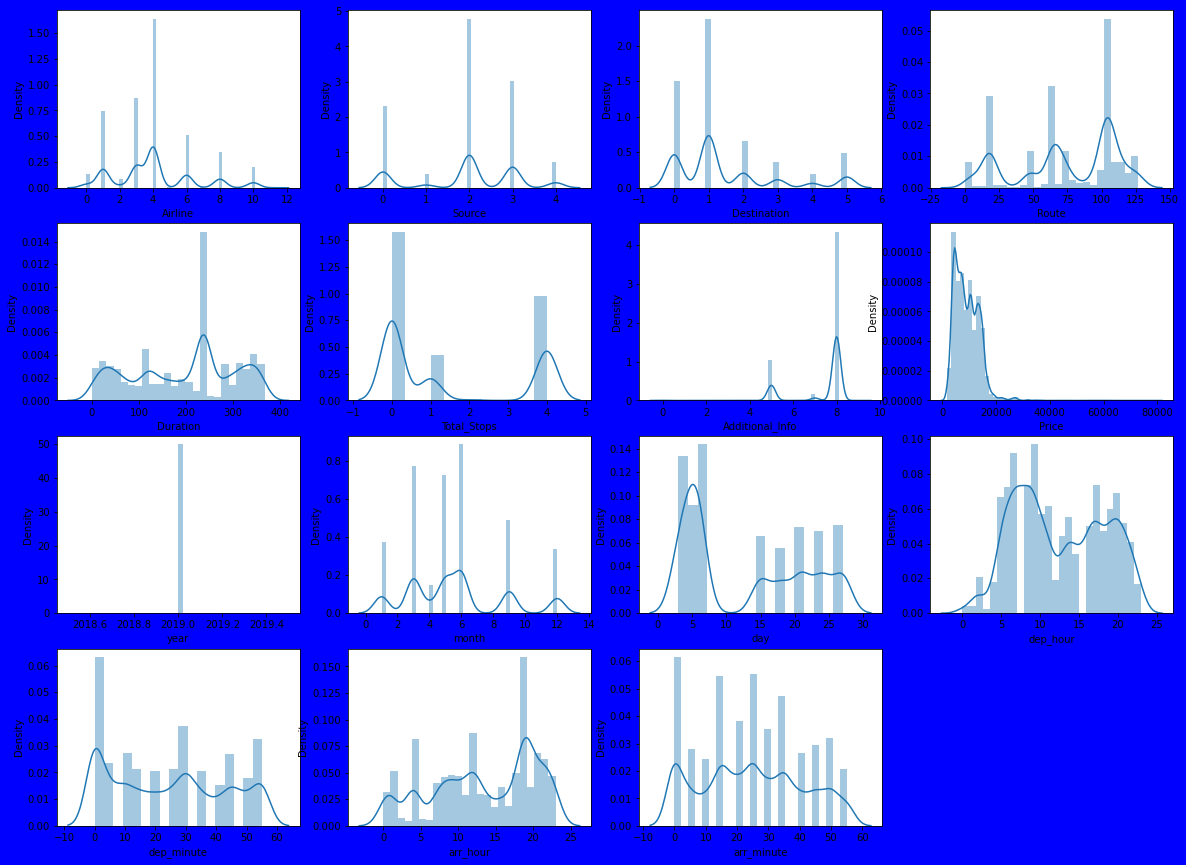

In [150]:
plt.figure(figsize = [20,15], facecolor = 'b')
plotnumber = 1

for column in data:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
    
plt.show()    

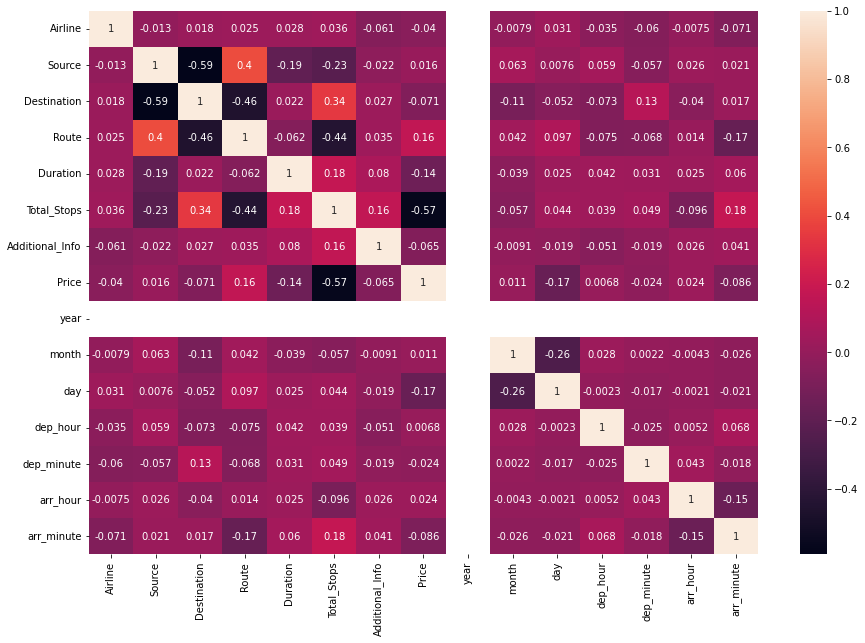

In [160]:
coor = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [161]:
x = data.drop(columns = ['Price'])
y = data.Price

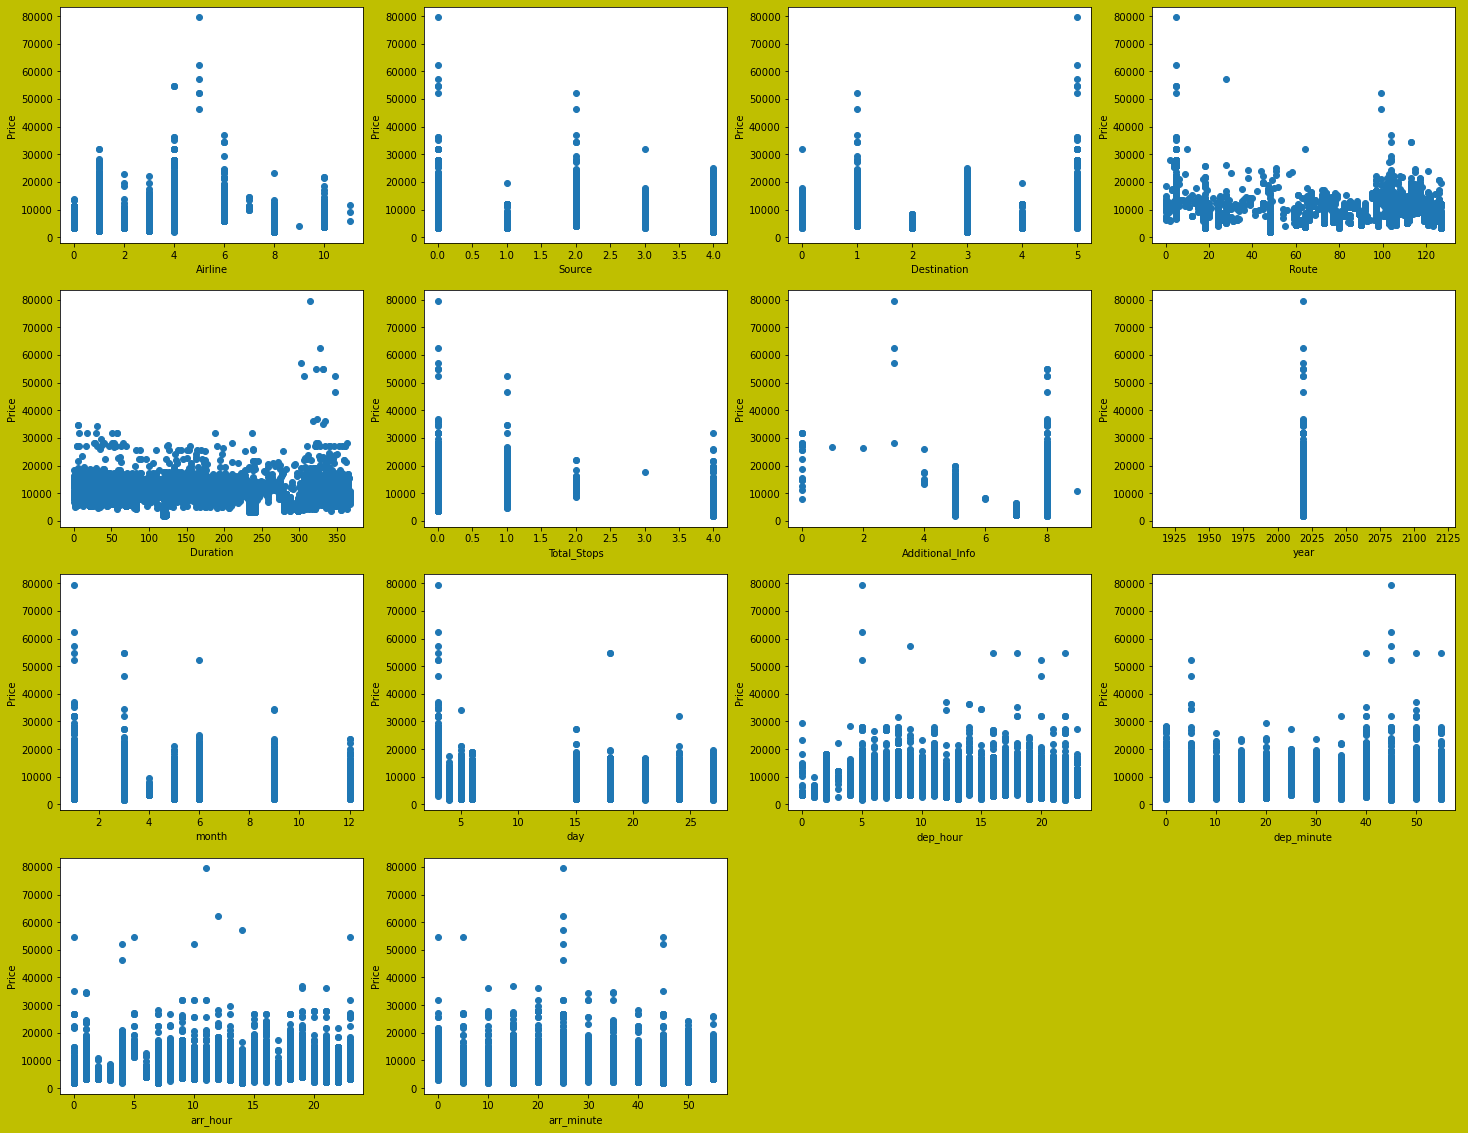

In [162]:
plt.figure(figsize = [25,20],facecolor='y')
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Price',fontsize=10)
    plotnumber+=1
    
plt.show()    

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

In [165]:
x_scaled = scaler.fit_transform(x)

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 79)

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
lr = LinearRegression()

In [170]:
lr.fit(x_train,y_train)

LinearRegression()

In [171]:
lr.score(x_train,y_train)

0.3764028378019295

In [172]:
lr.score(x_test,y_test)

0.3628711087734646

In [173]:
from sklearn.neighbors import KNeighborsRegressor

In [174]:
knn = KNeighborsRegressor()

In [175]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [176]:
knn.score(x_train,y_train)

0.7985164860924565

In [177]:
knn.score(x_test,y_test)

0.7183872629905175

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
dt = DecisionTreeRegressor()

In [182]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [183]:
dt.score(x_train,y_train)

0.9965621166560725

In [184]:
dt.score(x_test,y_test)

0.8568901975461735

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf = RandomForestRegressor()

In [188]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [189]:
rf.score(x_train,y_train)

0.9798386689030526

In [190]:
rf.score(x_test,y_test)

0.9095649287789397

In [192]:
y_pred = rf.predict(x_test)

In [193]:
y_pred

array([12858.27, 13286.43,  8952.83, ..., 17600.05,  3793.76, 11344.33])

In [ ]:
#### random forest regressor is the best model for this dataset